In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
fiximage_path = os.path.join(os.getcwd(), 'test_image.png')


(221, 496, 3)


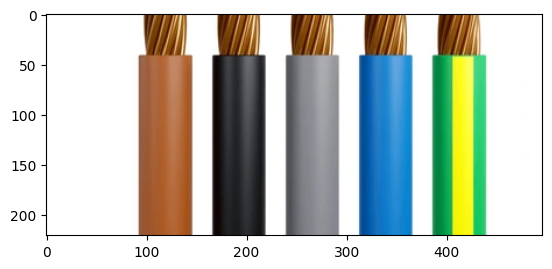

In [10]:
# Load image
image_path = os.path.join(os.getcwd(), 'test_image.png')
img = cv2.imread(image_path)
print(img.shape)
# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

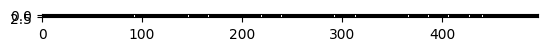

In [ ]:
# Convert to grayscale and apply Canny edge detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,200)

# Slice the image to get only the middle row
middle = int(edges.shape[0] / 2)
plt.imshow(edges[middle:middle+3], cmap='gray')

middle_row_gray = edges[middle]
edge_mid = np.where(middle_row_gray==255)[0]



In [ ]:
#locate the midpoints between the edges
midpoints = (edge_mid[:-1] + edge_mid[1:]) // 2
print(midpoints)

[119 156 192 229 265 302 339 376 396 416 433]


In [ ]:
# Define a dictionary of colors and function to find the closest color
color_dict = {
    "black":   (0, 0, 0),
    "white":   (255, 255, 255),
    "green":   (0, 255, 0),
    "blue":    (0, 0, 255),
    "yellow":  (255, 255, 0),
    "gray":    (80,80,80),
    "orange":   (225, 165, 0),
    "red":   (225, 0, 0),
    # Add more colors as needed
}



def closest_color(rgb, color_dict):
    min_distance = float('inf')
    closest_name = None
    for name, value in color_dict.items():
        distance = np.sqrt(sum((comp1 - comp2) ** 2 for comp1, comp2 in zip(rgb, value)))
        if distance < min_distance:
            min_distance = distance
            closest_name = name
    return closest_name

In [ ]:
print(closest_color(np.array([37, 39, 43]), color_dict))  # Example usage

black


Midpoint at 119 is closest to color: orange, debug color: [179, 102, 54] m (225, 165, 0)
Midpoint at 192 is closest to color: black, debug color: [37, 39, 43] m (0, 0, 0)
Midpoint at 265 is closest to color: gray, debug color: [140, 142, 148] m (80, 80, 80)
Midpoint at 339 is closest to color: blue, debug color: [25, 130, 206] m (0, 0, 255)
Midpoint at 396 is closest to color: gray, debug color: [2, 149, 73] m (80, 80, 80)
Midpoint at 416 is closest to color: yellow, debug color: [253, 253, 28] m (255, 255, 0)
Midpoint at 433 is closest to color: green, debug color: [41, 210, 119] m (0, 255, 0)
['orange', 'black', 'gray', 'blue', 'gray', 'yellow', 'green']


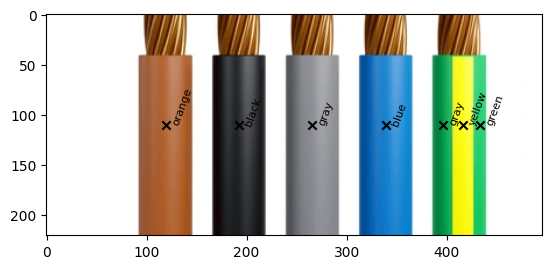

In [ ]:
#detect the color of the midpoints
recorded_colors = []
for midpoint in midpoints:
    color = img[middle, midpoint].tolist()
    closest = closest_color(color, color_dict)
    if closest == "white":# ignore white pixels since background is white
        continue
    print(f"Midpoint at {midpoint} is closest to color: {closest}, debug color: {color} m {color_dict[closest]}")
    recorded_colors.append(closest)
    plt.scatter(midpoint, middle, marker='x', color='k')
    plt.text(midpoint+5, middle, closest, color='k', fontsize=8,rotation=70)
plt.imshow(img)
print(recorded_colors)

In [ ]:
# Check correctness of the recorded colors
expected_colors = ['orange', 'black', 'gray', 'blue', 'yellow-green']
for sequence in range(len(expected_colors)):
    if recorded_colors[sequence] == expected_colors[sequence]:
        print(f"Color at position {sequence} is correct: {recorded_colors[sequence]}")
    else:
        print(f"Color at position {sequence} is incorrect: {recorded_colors[sequence]}, expected: {expected_colors[sequence]}")

Color at position 0 is correct: orange
Color at position 1 is correct: black
Color at position 2 is correct: gray
Color at position 3 is correct: blue
Color at position 4 is incorrect: gray, expected: yellow-green
